## **Exploratory Data Analysis**

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns

**Load Dataset**

In [2]:
from google.colab import files

uploaded = files.upload()

df = pd.read_excel('final_dataset.xlsx')

df.head()


Saving final_dataset.xlsx to final_dataset.xlsx


,Company,Funding Title,Amount,Round,Announced,Status,Completed,Federal Fund Effective Rate,10yr Treasury Yield,All Investors This Round,...,Lead Investors All Rounds,Total Raised Private,Total Raised All Rounds,Funding Tags,Company Tags,Date Manually Updated,UUID,Target Company UUID,Profile,Documents & News
0,Sirnaomics Inc.,Sirnaomics - IPO - $64M,64.0,IPO,2021-11-01,Completed,2021-12-30,0.08,1.52,NaN,...,Value Measured Investment; Guangzhou Yuexiu In...,267.0,331.0,NaN,siRNA (small interfering RNA); RNAi; LNP Deliv...,2021-12-30,d1200d49f397a337,7c959e91424bc4ae,https://app.dealforma.com/funding/15725,https://app.dealforma.com/download/documents/4...
1,Sirnaomics Inc.,Sirnaomics - IPO - $300M - Postponed,300.0,IPO,2021-07-26,Terminated,NaT,NaN,NaN,NaN,...,Value Measured Investment; Guangzhou Yuexiu In...,267.0,331.0,NaN,siRNA (small interfering RNA); RNAi; LNP Deliv...,2021-07-27,1f1298bc3096f5f9,7c959e91424bc4ae,https://app.dealforma.com/funding/13931,https://app.dealforma.com/download/documents/4...
2,Sirnaomics Inc.,Sirnaomics - Series E - $105M,105.0,Series E,2021-07-01,Completed,2021-07-01,0.10,1.48,Rotating Boulder Fund; Undisclosed Investors (...,...,Value Measured Investment; Guangzhou Yuexiu In...,267.0,331.0,NaN,siRNA (small interfering RNA); RNAi; LNP Deliv...,2021-07-02,adf72293ac2f05ca,7c959e91424bc4ae,https://app.dealforma.com/funding/13527,https://app.dealforma.com/download/documents/4...
3,Sirnaomics Inc.,Sirnaomics - Series D - $105M,105.0,Series D,2020-10-22,Completed,2020-10-22,0.09,0.87,Walvax Biotechnology Co. Ltd.; Sangel Capital ...,...,Value Measured Investment; Guangzhou Yuexiu In...,267.0,331.0,NaN,siRNA (small interfering RNA); RNAi; LNP Deliv...,2020-10-23,2c69a725a536c128,7c959e91424bc4ae,https://app.dealforma.com/funding/11393,https://app.dealforma.com/download/documents/3...
4,Sirnaomics Inc.,Sirnaomics - Series C - $47M,47.0,Series C,2018-06-06,Completed,2019-04-26,2.44,2.51,Guangzhou Yuexiu Industrial Investment Fund (Y...,...,Value Measured Investment; Guangzhou Yuexiu In...,267.0,331.0,NaN,siRNA (small interfering RNA); RNAi; LNP Deliv...,2019-04-29,05c8e4d2b5116eb2,7c959e91424bc4ae,https://app.dealforma.com/funding/8153,https://app.dealforma.com/download/documents/1...


**Cleaning/Tidying**

Convert to snake case

In [3]:
# Convert column names to snake_case
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('-', '_')
    .str.replace(r'[^\w\s]', '', regex=True)
)

# View changes
df.head()

,company,funding_title,amount,round,announced,status,completed,federal_fund_effective_rate,10yr_treasury_yield,all_investors_this_round,...,lead_investors_all_rounds,total_raised_private,total_raised_all_rounds,funding_tags,company_tags,date_manually_updated,uuid,target_company_uuid,profile,documents__news
0,Sirnaomics Inc.,Sirnaomics - IPO - $64M,64.0,IPO,2021-11-01,Completed,2021-12-30,0.08,1.52,NaN,...,Value Measured Investment; Guangzhou Yuexiu In...,267.0,331.0,NaN,siRNA (small interfering RNA); RNAi; LNP Deliv...,2021-12-30,d1200d49f397a337,7c959e91424bc4ae,https://app.dealforma.com/funding/15725,https://app.dealforma.com/download/documents/4...
1,Sirnaomics Inc.,Sirnaomics - IPO - $300M - Postponed,300.0,IPO,2021-07-26,Terminated,NaT,NaN,NaN,NaN,...,Value Measured Investment; Guangzhou Yuexiu In...,267.0,331.0,NaN,siRNA (small interfering RNA); RNAi; LNP Deliv...,2021-07-27,1f1298bc3096f5f9,7c959e91424bc4ae,https://app.dealforma.com/funding/13931,https://app.dealforma.com/download/documents/4...
2,Sirnaomics Inc.,Sirnaomics - Series E - $105M,105.0,Series E,2021-07-01,Completed,2021-07-01,0.10,1.48,Rotating Boulder Fund; Undisclosed Investors (...,...,Value Measured Investment; Guangzhou Yuexiu In...,267.0,331.0,NaN,siRNA (small interfering RNA); RNAi; LNP Deliv...,2021-07-02,adf72293ac2f05ca,7c959e91424bc4ae,https://app.dealforma.com/funding/13527,https://app.dealforma.com/download/documents/4...
3,Sirnaomics Inc.,Sirnaomics - Series D - $105M,105.0,Series D,2020-10-22,Completed,2020-10-22,0.09,0.87,Walvax Biotechnology Co. Ltd.; Sangel Capital ...,...,Value Measured Investment; Guangzhou Yuexiu In...,267.0,331.0,NaN,siRNA (small interfering RNA); RNAi; LNP Deliv...,2020-10-23,2c69a725a536c128,7c959e91424bc4ae,https://app.dealforma.com/funding/11393,https://app.dealforma.com/download/documents/3...
4,Sirnaomics Inc.,Sirnaomics - Series C - $47M,47.0,Series C,2018-06-06,Completed,2019-04-26,2.44,2.51,Guangzhou Yuexiu Industrial Investment Fund (Y...,...,Value Measured Investment; Guangzhou Yuexiu In...,267.0,331.0,NaN,siRNA (small interfering RNA); RNAi; LNP Deliv...,2019-04-29,05c8e4d2b5116eb2,7c959e91424bc4ae,https://app.dealforma.com/funding/8153,https://app.dealforma.com/download/documents/1...


Delete columns that will not be used

In [4]:
# Drop the columns that are not needed
columns_to_drop = [
    'funding_title', 'announced', 'status', 'all_investors_this_round',
    'all_tx_areas', 'all_technologies', 'company_description', 'website',
    'no_of_shares', 'price_per_share', 'pre_money_val', 'post_money_val',
    'country', 'ipodate_public', 'exchange', 'all_investors_all_rounds',
    'lead_investors_all_rounds', 'total_raised_private', 'funding_tags',
    'company_tags', 'date_manually_updated', 'uuid', 'target_company_uuid',
    'profile', 'documents__news'
]

# Drop the columns
df = df.drop(columns=columns_to_drop, errors='ignore')

# View changes
df.head()


,company,amount,round,completed,federal_fund_effective_rate,10yr_treasury_yield,lead_investor_this_round,lead_investor_co_type,stage_at_funding,primary_ta,indications,primary_tech,company_type,location,business_model,public_private,total_raised_all_rounds
0,Sirnaomics Inc.,64.0,IPO,2021-12-30,0.08,1.52,NaN,NaN,04 Phase II,Cancer,NaN,RNA,Biopharma - Public Small,"Gaithersburg, Maryland, United States, North A...",Platform and Own Product Development,Private,331.0
1,Sirnaomics Inc.,300.0,IPO,NaT,NaN,NaN,NaN,NaN,04 Phase II,Cancer,NaN,RNA,Biopharma - Public Small,"Gaithersburg, Maryland, United States, North A...",Platform and Own Product Development,Private,331.0
2,Sirnaomics Inc.,105.0,Series E,2021-07-01,0.10,1.48,Rotating Boulder Fund,Fin - VC / Private Equity,04 Phase II,Cancer,NaN,RNA,Biopharma - Public Small,"Gaithersburg, Maryland, United States, North A...",Platform and Own Product Development,Private,331.0
3,Sirnaomics Inc.,105.0,Series D,2020-10-22,0.09,0.87,NaN,NaN,02 Preclinical / IND,Cancer,NaN,RNA,Biopharma - Public Small,"Gaithersburg, Maryland, United States, North A...",Platform and Own Product Development,Private,331.0
4,Sirnaomics Inc.,47.0,Series C,2019-04-26,2.44,2.51,Guangzhou Yuexiu Industrial Investment Fund (Y...,Fin - VC / Private Equity,02 Preclinical / IND,Cancer,NaN,RNA,Biopharma - Public Small,"Gaithersburg, Maryland, United States, North A...",Platform and Own Product Development,Private,331.0


Clean value names

In [5]:
# Clean location to just display state
df['location'] = df['location'].astype(str)

df['location'] = df['location'].str.split(',').str[1].str.strip()

In [6]:
# Clean stage_at_funding to remove the irrelivant numbers preceding the stage name
df['stage_at_funding'] = df['stage_at_funding'].str.replace(r'^\d{2}\s+', '', regex=True)


In [7]:
# Clean company_type to removed "Biopharma -" preceding each type
df['company_type'] = df['company_type'].str.replace('Biopharma - ', '', regex=False)


In [8]:
# Clean the indications column by keeping only the first indication and deleting everything else
df['indications'] = df['indications'].str.split(';').str[0].str.strip()


In [9]:
# Confirm changes were made
df.sample(5)


,company,amount,round,completed,federal_fund_effective_rate,10yr_treasury_yield,lead_investor_this_round,lead_investor_co_type,stage_at_funding,primary_ta,indications,primary_tech,company_type,location,business_model,public_private,total_raised_all_rounds
1787,Chelsea Therapeutics International Ltd. (H. Lu...,23.0,Follow-On,2013-11-13,0.08,2.75,NaN,NaN,Phase III,Neurologic,Other,Small Molecule,Public Small,North Carolina,Late Stage Dev and Commercialization,Public,87.0
9003,Pinpoint Therapeutics Inc.,1.0,Seed,2020-02-11,1.58,1.59,Kairos Ventures,Fin - VC / Private Equity,Platform / Discovery,Cancer,NaN,Enzyme,Private,Pennsylvania,Platform and Own Product Development,Private,1.0
2600,EyePoint Pharmaceuticals Inc. (formerly pSivida),230.0,Common,2023-12-05,5.33,4.18,NaN,NaN,Approved,Ophthalmic,Age-related macular degeneration (AMD),Formulation - Sustained Release,Public Small,Massachusetts,Late Stage Dev and Commercialization,Public,863.0
2527,Esperion Therapeutics Inc. (re-acquired from p...,225.0,Common,2021-12-02,0.08,1.44,NaN,NaN,Approved,Cardiovascular,Diabetes,Small Molecule,Public Small,Michigan,Late Stage Dev and Commercialization,Public,1323.0
5209,Rexahn Pharmaceuticals Inc. (Ocuphire),5.7,Common,2013-07-26,0.09,2.58,NaN,NaN,Phase II,Cancer,Bladder cancer,Small Molecule,Public Small,Michigan,Platform and Own Product Development,Public,100.0


Alter data types

In [10]:
# Check data types
df.dtypes


,0
company,object
amount,float64
round,object
completed,datetime64[ns]
federal_fund_effective_rate,float64
10yr_treasury_yield,object
lead_investor_this_round,object
lead_investor_co_type,object
stage_at_funding,object
primary_ta,object


In [11]:
# Change to the appropriate data types

# Change date column to datetime
df['completed'] = pd.to_datetime(df['completed'], errors='coerce')

# Change numeric columns
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')
df['federal_fund_effective_rate'] = pd.to_numeric(df['federal_fund_effective_rate'], errors='coerce')
df['10yr_treasury_yield'] = pd.to_numeric(df['10yr_treasury_yield'], errors='coerce')
df['total_raised_all_rounds'] = pd.to_numeric(df['total_raised_all_rounds'], errors='coerce')

# Change categorical columns to 'category' dtype
categorical_columns = [
    'company',
    'round',
    'lead_investor_this_round',
    'lead_investor_co_type',
    'stage_at_funding',
    'primary_ta',
    'indications',
    'primary_tech',
    'company_type',
    'location',
    'business_model',
    'public_private'
]

for col in categorical_columns:
    df[col] = df[col].astype('category')

# View changes
print(df.dtypes)




company                              category
amount                                float64
round                                category
completed                      datetime64[ns]
federal_fund_effective_rate           float64
10yr_treasury_yield                   float64
lead_investor_this_round             category
lead_investor_co_type                category
stage_at_funding                     category
primary_ta                           category
indications                          category
primary_tech                         category
company_type                         category
location                             category
business_model                       category
public_private                       category
total_raised_all_rounds               float64
dtype: object


Handle duplicate rows

In [12]:
# Check for duplicate rows
df.duplicated().sum()


np.int64(88)

In [13]:
# View duplicate rows
df[df.duplicated()]


,company,amount,round,completed,federal_fund_effective_rate,10yr_treasury_yield,lead_investor_this_round,lead_investor_co_type,stage_at_funding,primary_ta,indications,primary_tech,company_type,location,business_model,public_private,total_raised_all_rounds
33,AbbVie Inc.,750.0,Convertible Notes,2019-11-12,1.55,1.92,NaN,NaN,Approved,Autoimmune,NaN,Small Molecule,Public Large,Illinois,Fully Integrated,Public,58359.0
34,AbbVie Inc.,750.0,Convertible Notes,2019-11-12,1.55,1.92,NaN,NaN,Approved,Autoimmune,NaN,Small Molecule,Public Large,Illinois,Fully Integrated,Public,58359.0
40,AbbVie Inc.,4000.0,Convertible Notes,2019-11-12,1.55,1.92,NaN,NaN,Approved,Autoimmune,NaN,Small Molecule,Public Large,Illinois,Fully Integrated,Public,58359.0
48,AbbVie Inc.,1000.0,Convertible Notes,2016-05-09,0.37,1.77,NaN,NaN,Approved,Autoimmune,NaN,Small Molecule,Public Large,Illinois,Fully Integrated,Public,58359.0
49,AbbVie Inc.,2000.0,Convertible Notes,2016-05-09,0.37,1.77,NaN,NaN,Approved,Autoimmune,NaN,Small Molecule,Public Large,Illinois,Fully Integrated,Public,58359.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6496,Viatris Inc. (formerly Mylan),500.0,Convertible Notes,2013-11-29,0.07,2.75,NaN,NaN,Approved,Infectious,Influenza virus,Small Molecule,Public Medium,Pennsylvania,Generics/Biosimilars,Public,14500.0
6497,Viatris Inc. (formerly Mylan),500.0,Convertible Notes,2013-11-29,0.07,2.75,NaN,NaN,Approved,Infectious,Influenza virus,Small Molecule,Public Medium,Pennsylvania,Generics/Biosimilars,Public,14500.0
6498,Viatris Inc. (formerly Mylan),500.0,Convertible Notes,2013-11-29,0.07,2.75,NaN,NaN,Approved,Infectious,Influenza virus,Small Molecule,Public Medium,Pennsylvania,Generics/Biosimilars,Public,14500.0
6634,Xencor Inc.,122.9,Common,2015-03-02,0.12,2.08,NaN,NaN,Phase II,Autoimmune,Prostate cancer,Antibody,Public Medium,California,Late Stage Dev and Commercialization,Public,914.0


Drop duplicate rows - Confirmed that duplicate rows are double entries of the exact same funding instance and can safely be dropped.

In [14]:
# Drop duplicates
df = df.drop_duplicates()

# Confirm change
df.duplicated().sum()



np.int64(0)

Handle missing values

In [15]:
# Summarize missing values for each column
missing_summary = df.isnull().sum().to_frame(name='missing_count')
missing_summary['missing_percent'] = (missing_summary['missing_count'] / len(df)) * 100
missing_summary


,missing_count,missing_percent
company,0,0.000000
amount,298,3.106756
round,0,0.000000
completed,70,0.729775
federal_fund_effective_rate,70,0.729775
10yr_treasury_yield,330,3.440367
lead_investor_this_round,5679,59.205588
lead_investor_co_type,5679,59.205588
stage_at_funding,0,0.000000
primary_ta,0,0.000000


# **Results (Tables/Visualizations)**

Summary Stats: Continuous Variables

In [16]:
# List of continuous columns
continuous_vars = [
    'amount',
    'federal_fund_effective_rate',
    '10yr_treasury_yield',
    'total_raised_all_rounds'
]

# Build summary table
summary_data = []
for var in continuous_vars:
    series = df[var].dropna()
    summary_data.append({
        'Variable': var,
        'Mean': series.mean(),
        'Median': series.median(),
        'Std Dev': series.std(),
        'Min': series.min(),
        'Max': series.max(),
        'Skew': skew(series),
        'Kurtosis': kurtosis(series)
    })

summary_table = pd.DataFrame(summary_data)
summary_table


,Variable,Mean,Median,Std Dev,Min,Max,Skew,Kurtosis
0,amount,93.375705,30.00,262.077960,0.10,6000.00,9.994265,143.559566
1,federal_fund_effective_rate,1.425270,0.36,1.816393,0.04,5.33,1.193521,-0.049240
2,10yr_treasury_yield,2.463186,2.34,1.047058,0.52,5.25,0.317049,-0.619290
3,total_raised_all_rounds,1388.461033,226.00,6722.688273,1.00,61740.00,7.414527,55.805863


Frequency table for stage_at_funding

In [17]:
# Summarize stage_at_funding
counts = df['stage_at_funding'].value_counts(dropna=False)
percents = (counts / counts.sum() * 100).round(1)

# Combine into a clean table
stage_summary = pd.DataFrame({
    'Stage at Funding': counts.index,
    'Count': counts.values,
    'Percent': percents.values
})

# View
stage_summary




,Stage at Funding,Count,Percent
0,Phase II,2232,23.3
1,Phase III,1698,17.7
2,Preclinical / IND,1497,15.6
3,Phase I,1420,14.8
4,Approved,1345,14.0
5,Platform / Discovery,1002,10.4
6,Not Disclosed,206,2.1
7,Not Applicable,150,1.6
8,Diagnostic - Any,23,0.2
9,Device - Any,19,0.2


Correlogram

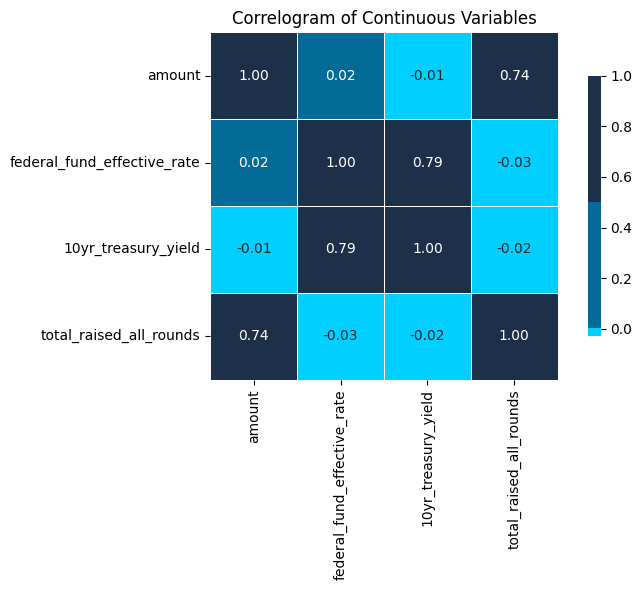

In [18]:
# Define accessible color palette
accessible_cmap = sns.color_palette(['#B3EFFF', '#00CFFF', '#046B99', '#1C304A'])

# Correlation matrix
cont_vars = ['amount', 'federal_fund_effective_rate', '10yr_treasury_yield', 'total_raised_all_rounds']
corr_matrix = df[cont_vars].corr()

# Plot correlogram using accessible colors
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap=accessible_cmap,
    center=0,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75}
)

plt.title('Correlogram of Continuous Variables', fontsize=12, color='#000000')
plt.xticks(color='#000000')
plt.yticks(color='#000000')
plt.tight_layout()
plt.show()

Visualization for each variable in the dataset

Outcome Variable Visualization (amount)

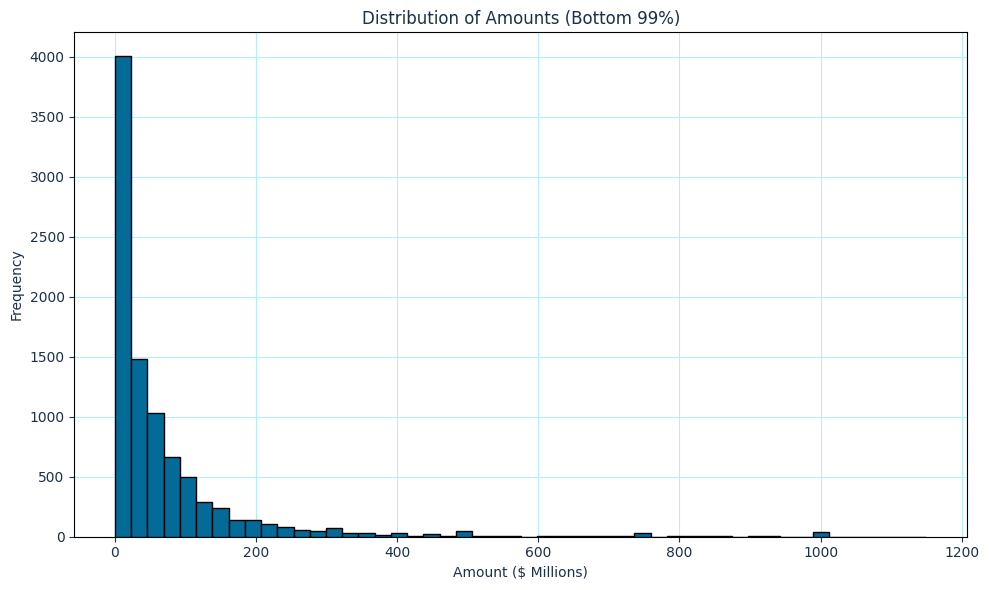

In [20]:
# Remove top 1% to give better distribution visibility
cutoff = df['amount'].quantile(0.99)
df_filtered = df[df['amount'] <= cutoff]

# Plot using accessible color palette
plt.figure(figsize=(10, 6))
plt.grid(True, color='#B3EFFF', zorder=0)
plt.hist(df_filtered['amount'], bins=50, color='#046B99', edgecolor='#000000', zorder=3)
plt.title('Distribution of Amounts (Bottom 99%)', color='#1C304A')
plt.xlabel('Amount ($ Millions)', color='#1C304A')
plt.ylabel('Frequency', color='#1C304A')
plt.tick_params(colors='#1C304A')
plt.tight_layout()
plt.show()





Identifier Visualization (company)

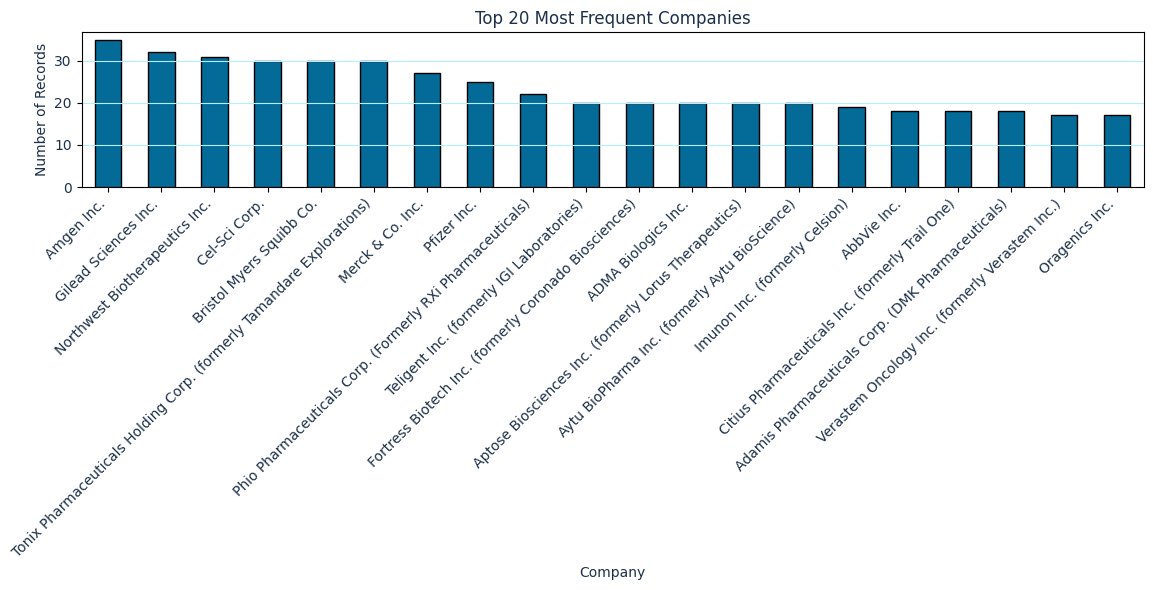

In [21]:
# Count the number of times each company appears
company_counts = df['company'].value_counts().head(20)

# Plot the distribution
plt.figure(figsize=(12, 6))
company_counts.plot(kind='bar', color='#046B99', edgecolor='#000000')
plt.title('Top 20 Most Frequent Companies', color='#1C304A')
plt.xlabel('Company', color='#1C304A')
plt.ylabel('Number of Records', color='#1C304A')
plt.xticks(rotation=45, ha='right', color='#1C304A')
plt.yticks(color='#1C304A')
plt.grid(axis='y', color='#B3EFFF')
plt.tight_layout()
plt.show()

Frequencies of remaining predictors

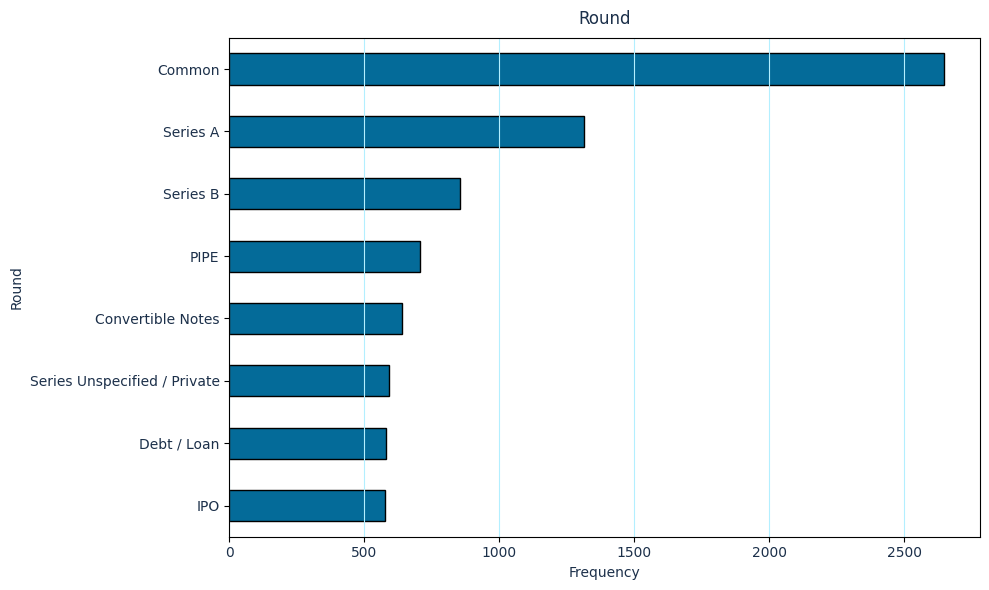

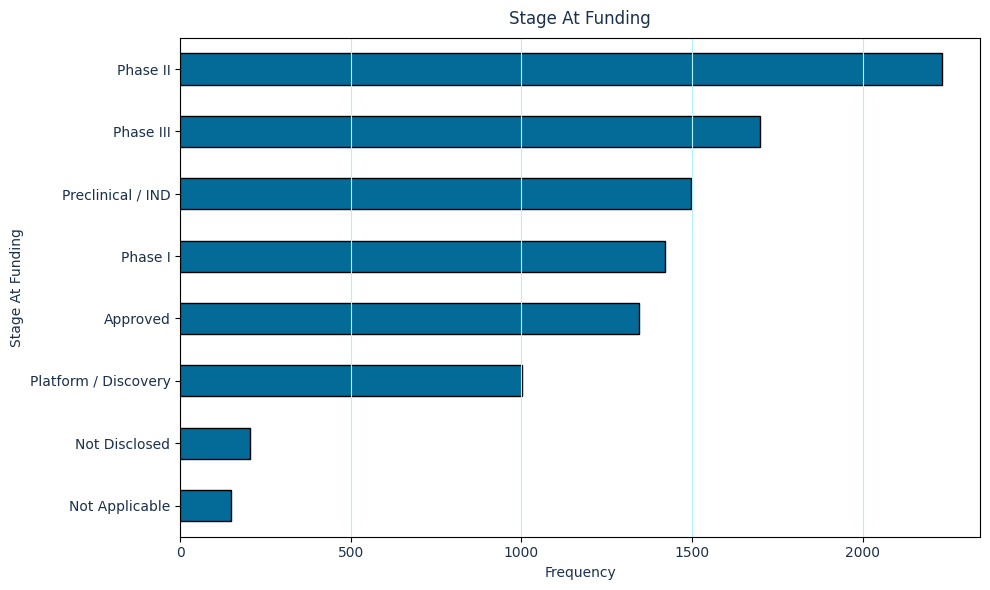

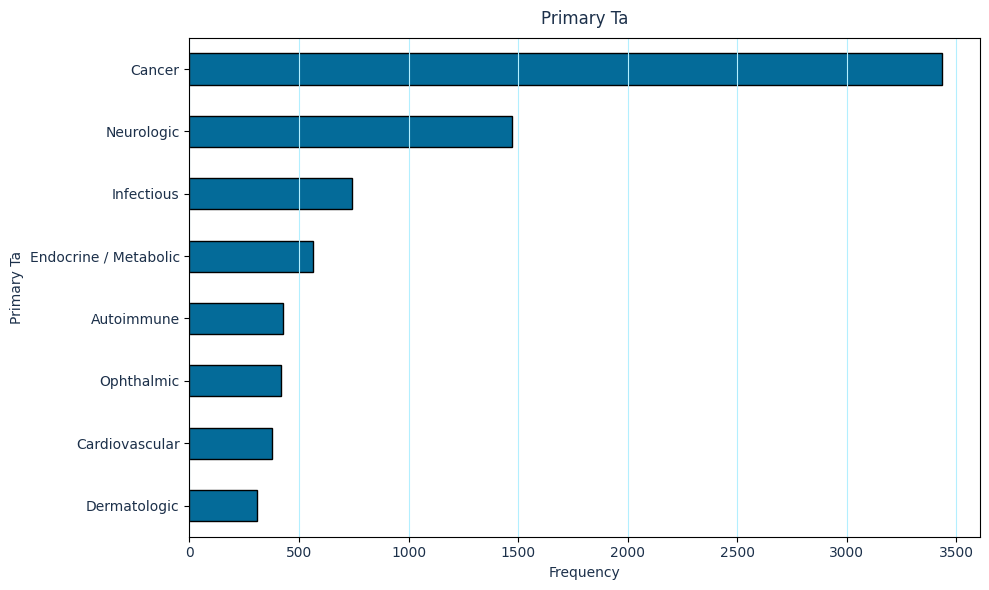

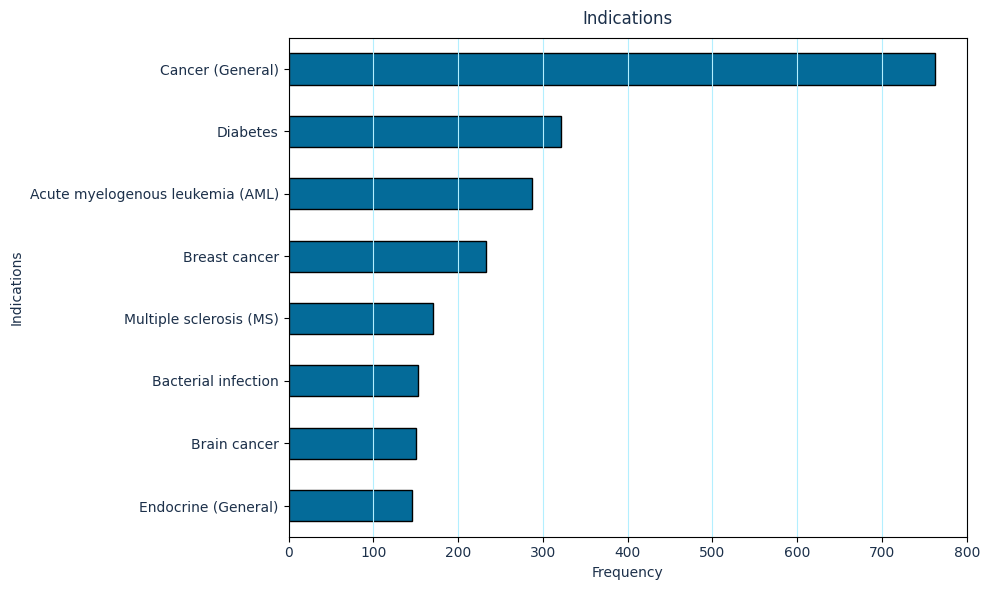

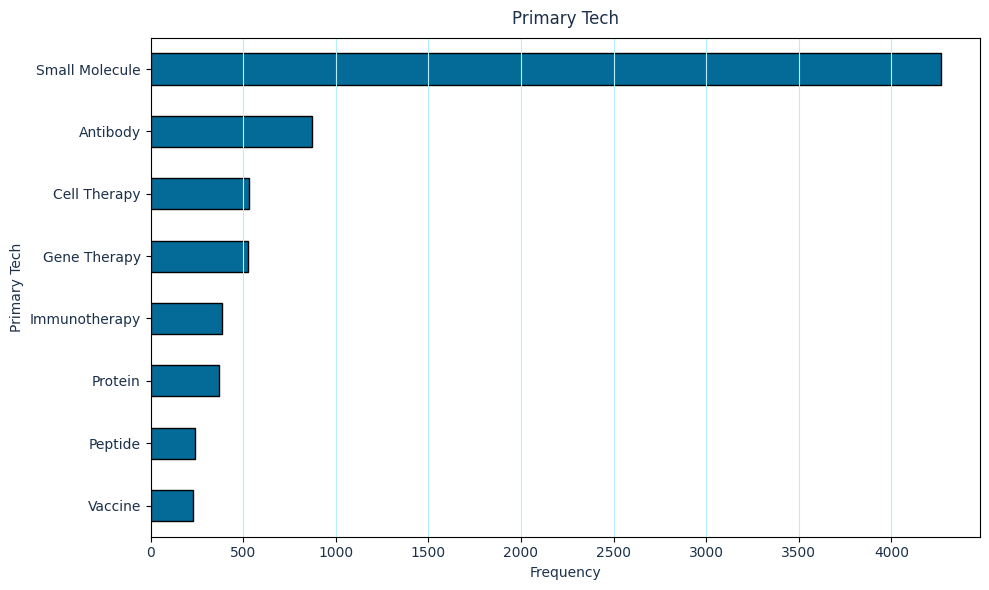

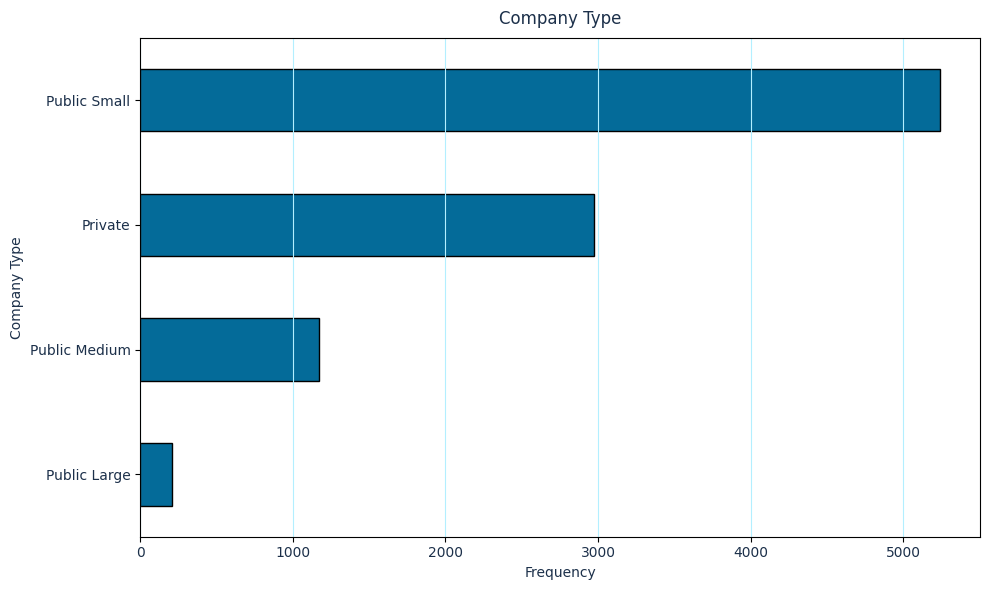

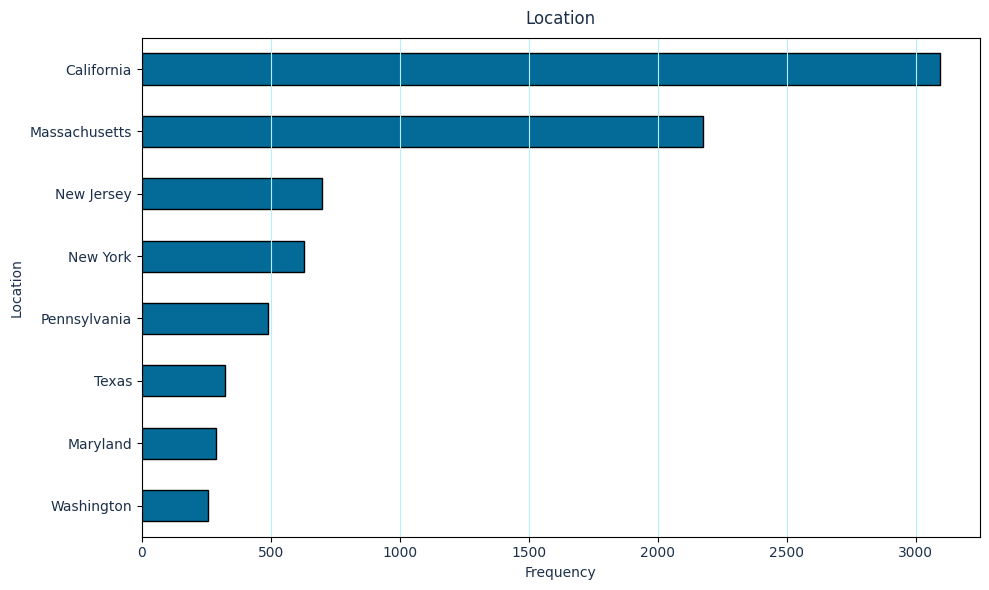

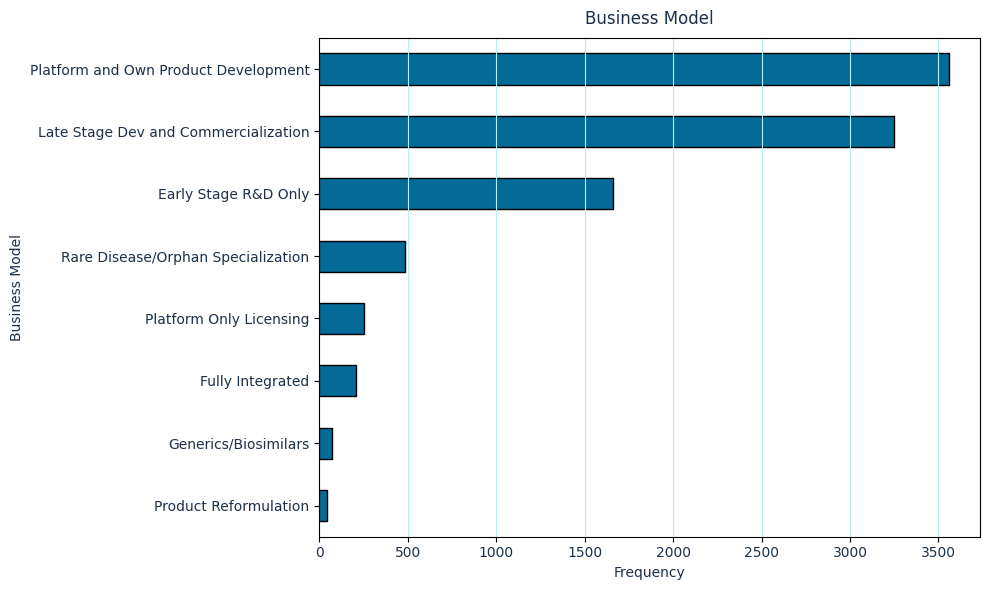

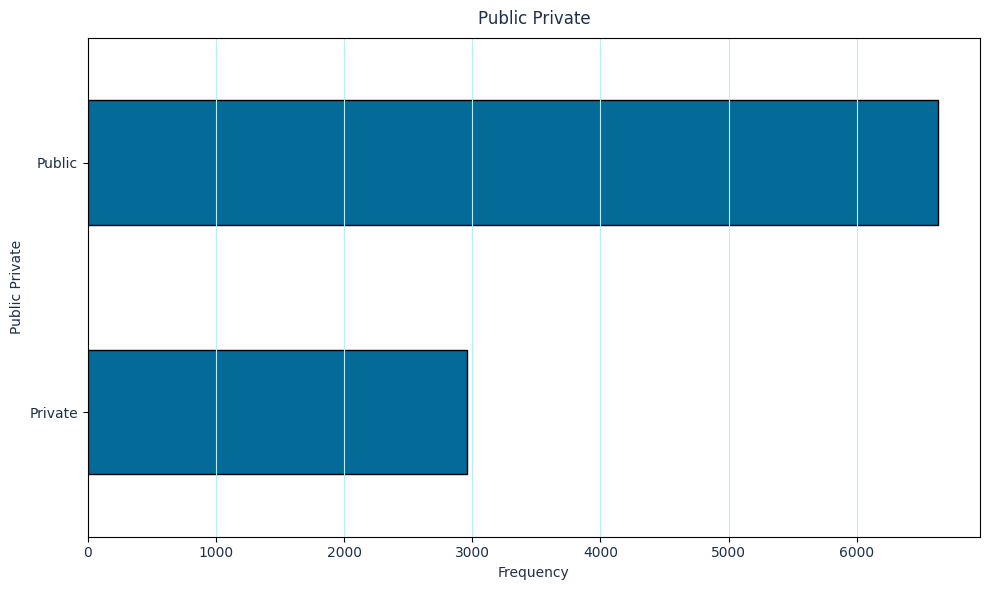

In [22]:

# Columns to plot
columns = [
    'round', 'stage_at_funding', 'primary_ta', 'indications',
    'primary_tech', 'company_type', 'location', 'business_model', 'public_private'
]

# Create one plot per column
for col in columns:
    top_counts = df[col].value_counts().head(8)

    plt.figure(figsize=(10, 6))
    top_counts.plot(kind='barh', color='#046B99', edgecolor='#000000')
    plt.title(col.replace('_', ' ').title(), color='#1C304A', pad=10)
    plt.xlabel('Frequency', color='#1C304A')
    plt.ylabel(col.replace('_', ' ').title(), color='#1C304A')
    plt.tick_params(labelcolor='#1C304A')
    plt.gca().invert_yaxis()
    plt.grid(True, axis='x', color='#B3EFFF')
    plt.tight_layout()
    plt.show()



Exploring dates of funding

<ipython-input-23-990e62e39fe6>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['year', 'public_private'])['amount'].sum().unstack()


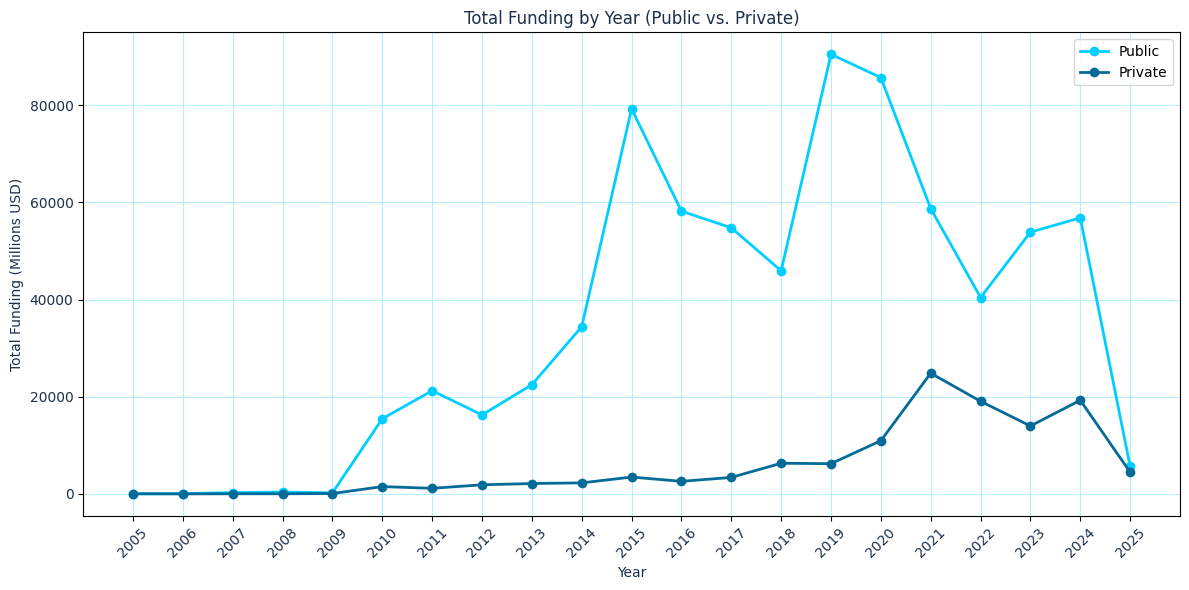

In [23]:
# Ensure 'completed' is datetime
df['completed'] = pd.to_datetime(df['completed'], errors='coerce')

# Extract year
df['year'] = df['completed'].dt.year

# Group by year and public_private, sum funding
grouped = df.groupby(['year', 'public_private'])['amount'].sum().unstack()

# Ensure index is int
grouped.index = grouped.index.astype(int)

# Plot
plt.figure(figsize=(12, 6))

# Plot lines for public and private
if 'Public' in grouped.columns:
    plt.plot(grouped.index, grouped['Public'], marker='o', label='Public', color='#00CFFF', linewidth=2)
if 'Private' in grouped.columns:
    plt.plot(grouped.index, grouped['Private'], marker='o', label='Private', color='#046B99', linewidth=2)

# Formatting
plt.title('Total Funding by Year (Public vs. Private)', color='#1C304A')
plt.xlabel('Year', color='#1C304A')
plt.ylabel('Total Funding (Millions USD)', color='#1C304A')
plt.grid(True, color='#B3EFFF')
plt.xticks(ticks=grouped.index, rotation=45, color='#1C304A')
plt.yticks(color='#1C304A')
plt.legend()
plt.tight_layout()
plt.show()

Exploring lead_investor_this_round by frequency

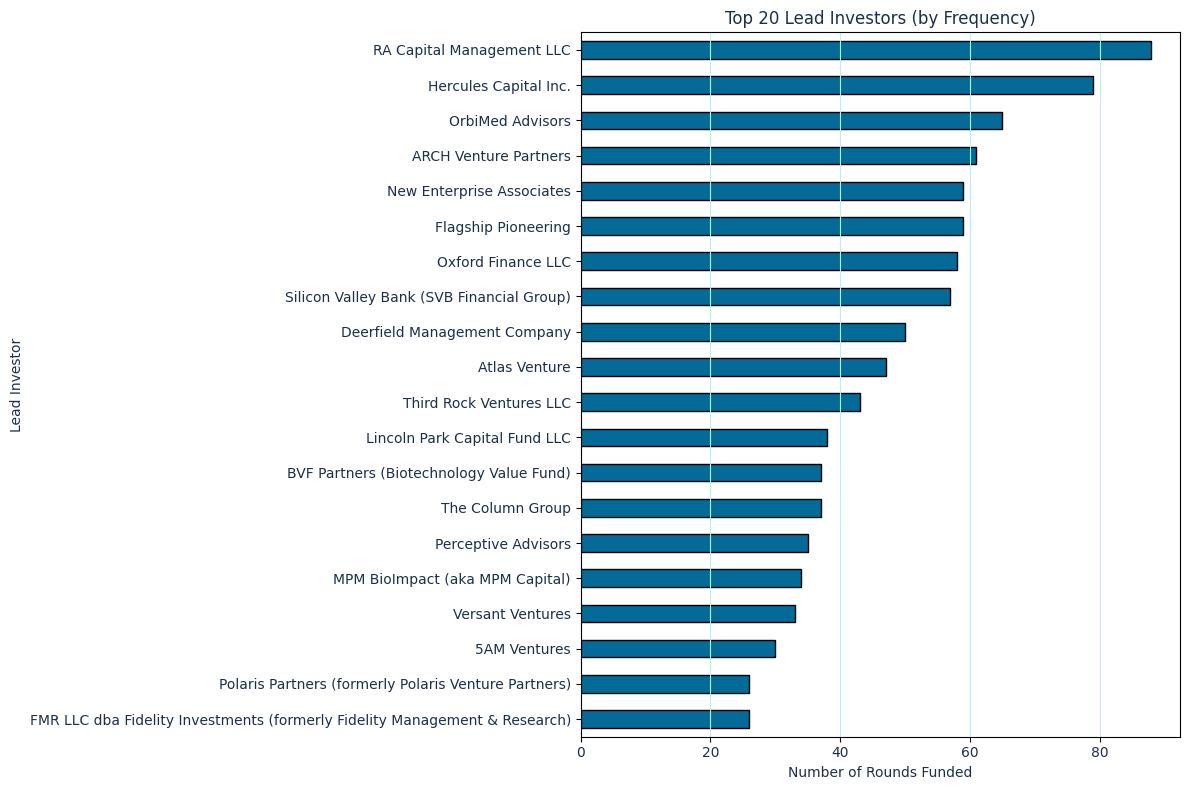

In [24]:
# Get top 20 lead investors by frequency
top_investors = df['lead_investor_this_round'].value_counts().head(20)

# Plot
plt.figure(figsize=(12, 8))
top_investors.plot(kind='barh', color='#046B99', edgecolor='#000000')
plt.title('Top 20 Lead Investors (by Frequency)', color='#1C304A')
plt.xlabel('Number of Rounds Funded', color='#1C304A')
plt.ylabel('Lead Investor', color='#1C304A')
plt.gca().invert_yaxis()  # Highest bar on top
plt.tick_params(labelcolor='#1C304A')
plt.grid(True, axis='x', color='#B3EFFF')
plt.tight_layout()
plt.show()


Bivariate Plots

([0, 1, 2, 3],
 [Text(0, 0, 'Private'),
  Text(1, 0, 'Public Large'),
  Text(2, 0, 'Public Medium'),
  Text(3, 0, 'Public Small')])

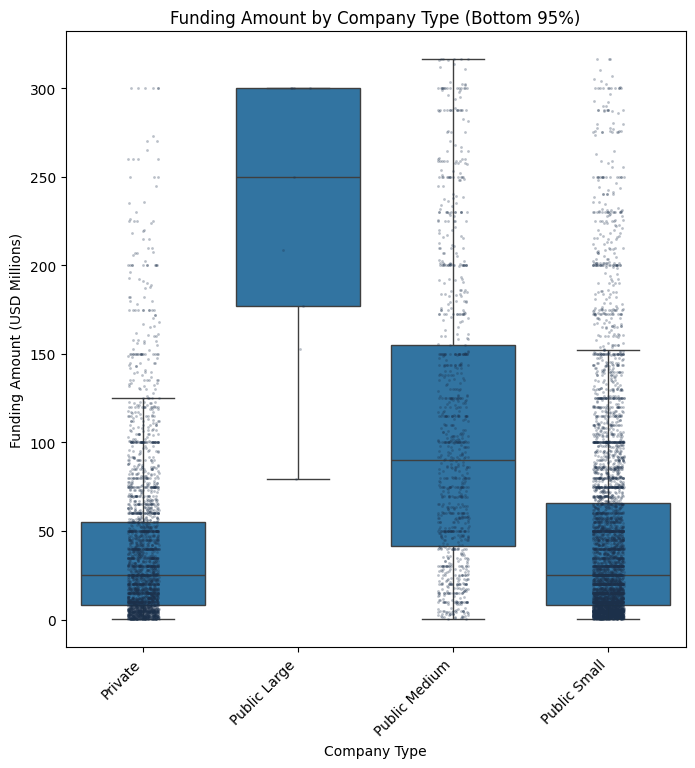

In [44]:
# Filter out outliers
filtered_df = df[df['amount'] <= df['amount'].quantile(0.95)]

plt.figure(figsize=(8, 8))

# Boxplot
sns.boxplot(x='company_type', y='amount', data=filtered_df, showfliers=False)

# Overlay individual data points
sns.stripplot(x='company_type', y='amount', data=filtered_df,
              color='#1C304A', size=2, jitter=True, alpha=0.3)

plt.title('Funding Amount by Company Type (Bottom 95%)')
plt.xlabel('Company Type')
plt.ylabel('Funding Amount (USD Millions)')
plt.xticks(rotation=45, ha='right')

